In [1]:
import pandas as pd
import re
import matplotlib
# 调整Pandas显示设置，以允许显示更长的文本内容
pd.set_option('display.max_colwidth', None)
# 加载JSONL文件
df = pd.read_json('./other_noPic_01.jsonl', lines=True)

# 显示前几行数据以确认加载正确
df.head()


question  \
0  3.五行学说在中医学中的应用\n+--------+----------+--------------------------------------------------+\n| 五   |          |                                                  |\n| 行学说 |          |                                                  |\n| 在中医 |          |                                                  |\n| 学中的 |          |                                                  |\n| 应用 |          |                                                  |\n+--------+----------+--------------------------------------------------+\n| 说明   | ①相生关  |                                                  |\n| 五脏病 | 系的传变 |                                                  |\n| 变的相 | ："母病  |                                                  |\n| 互影响 | 及子"；" |                                                  |\n|        | 子病及母 |                                                  |\n|        | "，如肝  |                                                  |\n|        | 肾亏损。 |                                                  |\n|        |          |                                                  |\n|        | ②相      |                                                  |\n|        | 克关系的 |                                                  |\n|        | 传变如木 |                                                  |\n|        | 与土；肝 |                                                  |\n|        | 脾不调。 |                                                  |\n|        |          |                                                  |\n|        | 《素问   |                                                  |\n|        | ·咳论》  |                                                  |\n|        | 说："五  |                                                  |\n|        | 脏各以其 |                                                  |\n|        | 时受病.. |                                                  |\n|        | ....乘秋 |                                                  |\n|        | 则肺先受 |                                                  |\n|        | 邪，乘春 |                                                  |\n|        | 则肝先受 |                                                  |\n|        | 之，乘夏 |                                                  |\n|        | 则心先受 |                                                  |\n|        | 之，乘至 |                                                  |\n|        | 阴则脾先 |                                                  |\n|        | 受之，乘 |                                                  |\n|        | 冬则肾先 |                                                  |\n|        | 受之。"  |                                                  |\n|        |          |                                                  |\n|        | 《       |                                                  |\n|        | 难经经释 |                                                  |\n|        | 》说："  |                                                  |\n|        | 所不胜， |                                                  |\n|        | 克我者也 |                                                  |\n|        | 。脏气本 |                                                  |\n|        | 已相制， |                                                  |\n|        | 而邪气挟 |                                                  |\n|        | 其力而来 |                                                  |\n|        | ，残削必 |                                                  |\n|        | 甚，故为 |                                                  |\n|        | 贼邪"；  |                                                  |\n|        | "所胜，  |                                                  |\n|        | 我所克也 |                                                  |\n|        | 。脏气既 |                                                  |\n|        | 受制于我 |                                                  |\n|        | ，则邪气 |                                                  |\n|        | 亦不能深 |                                                  |\n|        | 人，故为 

In [2]:
# 检查问题和答案列是否有空值,检查答案长度，检查过短问题
#missing_questions = df['question'].isnull().sum()
#missing_answers = df['answer'].isnull().sum()
#missing_questions, missing_answers

import matplotlib.pyplot as plt

def fliter_data(df):

    # 检查`answer`栏中字符数超过1000的行
    long_answers = df[df['answer'].apply(len) > 1000]
    long_answers_count = len(long_answers)
    # 导出这些行为JSON文件
    long_answers.to_json('./answers_toolong.json', orient='records', lines=True)

    # 检查`question`栏中字符数小于8的行
    lack_question = df[df['question'].apply(len) < 8]
    short_questions_count = len(lack_question)
    
    # 导出这些行为JSON文件
    lack_question.to_json('./lack_question.json', orient='records', lines=True)

    #建立图表数据
    data = {'Long Answers': long_answers_count, 'Short Questions': short_questions_count}
    categories = list(data.keys())
    counts = list(data.values())
    
    # 创建柱状图
    plt.figure(figsize=(8,4))  # 设置图形的大小
    plt.bar(categories, counts, color=['blue', 'green'])  # 选择柱状颜色
    plt.xlabel('Category')  # x轴标签
    plt.ylabel('Number of Rows')  # y轴标签
    plt.title('Number of Rows by Category')  # 图形标题
    
    bars = plt.bar(categories, counts, color=['blue', 'green'], width=0.4)  # 设置柱状颜色和宽度

    # 在每个柱子上方添加数字
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')
        
    plt.show()
    
    fliterder_df = df[~(df['answer'].apply(len) > 1000) & ~(df['question'].apply(len) < 8)]

    return fliterder_df


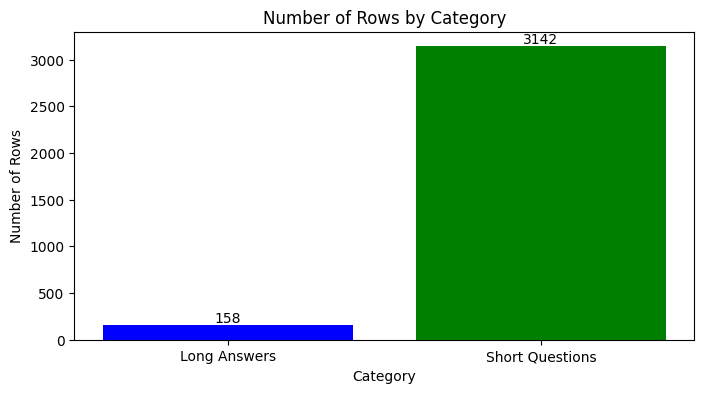

In [3]:
fliterder_df = fliter_data(df)


In [4]:
data = pd.read_json('./lack_question.json', lines=True)

fliterder_df.head()

,question,answer,detail_data,topic_number
1,"1．扩展语句\n- 一要看清题目要求，如扩展重点、字数等；\n- 二要""添枝加叶""，给句子主干增加修饰性或限制性词语，使之形象生动；\n- 三要运用修辞手法，增加意蕴；\n- 四要注意虚实结合，写出丰富内涵。\n\[例1\]\n请根据王维的诗句""竹喧归浣女""写一个场景。\n要求：①想象合理；②语言生动；③不超过50字。（4分）",答案：\n浣完衣服的少女拎着水桶，踏着月色，从婆娑的竹林间穿过，伴着银铃般的笑声，叽叽喳喳地打闹着归来。\n月光在竹林中洒下斑斑光点，四周一片寂静。一阵风吹来，传来洗衣归来的少女的喧哗。话音如玉盘落珠般清脆，笑声如银铃摇动般响亮，是这般地无忧无虑。,"{'origin': '07.md', 'pic_count': 0, 'images': {}}",NaN
2,"2．压缩语段\nA.从步骤上讲\n首先，审清题干要求，定向筛选；\n其次，整体把握语段的内容，分点概括；\n第三，尽可能寻找中心句，筛选关键词，合并归纳语意。要求筛选的关键词一般是名词、动词、形容词，不包括虚词。\nB.从方法上讲\n材料的表达方式不同，采取的策略也不同。\n记叙性语段，关键信息应包括时间、地点、对象、事件等。\n议论性语段，要提取表现主旨、观点的词句，删除论证性的、支撑性的、解释性的语句。\n说明性语段，要求提炼的主题词应是最能反映事物本质特征的词语。\n\[例2\]\n请从下面论文简介中提取3个反应其主要信息的关键词语。（3分）\n这篇文章对中国文明进程中具有重要意义的""士""在先秦时期的演进做了全景式的追寻，有助于人们对""士""的源起及早期衍变形成一个完整而清晰的印象。\n关键词语：","答案：士、先秦、演进\n\[例3\]\n根据下面一段文字，概括说明什么是""洼地效应""(不超过30个字)。（4分）\n区域竞争的焦点更多的集中在综合环境的竞争上。这里的""环境""既包括政务环境、市场环境、法制环境、人文环境等""软环境""，也包括绿化覆盖率、空气质量、居住条件、基础设施水平等""硬环境""。谁的环境好，""洼地效应""就明显，吸引力就强，项目、资金、技术、人才等生产要素聚集就快，发展就快。\n""洼地效应""指：\n答案：环境优势加速（生产要素）向该区域集聚从而促进发展的现象。","{'origin': '07.md', 'pic_count': 0, 'images': {}}",NaN
3,4．选用、变换句式\n选用句式要区别不同句式在表意轻重、语气强弱方面的差别，如反问句、双重否定句比一般陈述句语意重、语气强烈。\n变换句式不能改变原意，要同语境协调。\n长短句互换时要善于提取句子主干，然后按一定的语法或语意关系，分层组合修饰成分。\n重组句子一般是改换句子开头或改变陈述对象，要善于抓住句子间的内在关系，提取其中的关键词句。\n\[例5\]\n将下面3个句子整合为一个单句。（可调整语序、适当增删词语，不能改变原意）（4分）\n①王力先生认为，中国旧体诗以音步、平仄相间构成抑扬美。\n②王力先生认为，中国旧体诗的音乐美分为抑扬美和回环美。\n③王力先生认为，中国旧体诗以同韵字来来回回的重复构成回环美。,"答案：王力先生认为，中国旧体诗的音乐美分为以音步、平仄相间构成的抑扬美和以同韵字来来回回的重复构成的回环美。\n\[例6\]\n用""帕格尼尼""作为首句的开头，将下列长句改成由4个短句组成的句子。要求：保持原意，语句通顺，语意连贯，可适当增减个别词语。\n世界级小提琴家帕格尼尼是一位从上帝那里同时接受天赋和苦难两项馈赠而又善于用苦难的琴弦把天赋演绎到极致的奇人。\n答案：①帕格尼尼是一位世界级小提琴家，②也是一位奇人，③从上帝那里同时接受天赋和苦难两项馈赠，④而他又善于用苦难的琴弦把天赋演绎到极致。","{'origin': '07.md', 'pic_count': 0, 'images': {}}",NaN
4,"5．准确、鲜明、生动，简明、连贯、得体\n""准确""，就是要正确选择词语、句式和语气，其中用词须符合语境，符合语法和逻辑。事实上，良好的语感能帮助我们解决许多""准确""的问题。\n""鲜明""，就是要观点明确，爱憎分明，不能使用""可能""""也许""之类的词语。\n""生动""，就是要灵活运用各种表达方式，善于运用修辞手法。可使用描绘性的词语，可运用名句名篇，可联想想象，可于描述中融入丰富的情感。\n""简明""，既要""简要""，无赘余，又要""明确""，无歧义。\n""连贯""，要保持话题、陈述对象、叙述角度一致，着重分析句子内隐的层次关系，充分利用表顺序的关键词。\n""得体""，要看对象，看场合，掌握谦辞、敬辞，把握词语的感情色彩和语体色彩，了解有关应用文的文体特点，学会恰当转述。\n\[例7\]\n学校成立若干学生社团，请你从下列选项中选出三副内容适合的对联\n，分别送给戏剧社，文学社和摄影小组，以示祝贺。（在答题卡相应位置上填写序号）（3分）\n①现出庐山真面目 留住秋水田丰神\n②藏古今学术 聚天地精华\n③常向秋山寻妙句 又驱春色入毫端\n④天涯雁寄回文锦 水国鱼传尺素书\n⑤ 看我非我，我看我，我也非我 装谁像谁，谁装谁，谁就像谁","答案：戏剧社【⑤】 文学社【③】 摄影小组【①】\n\[例8\]\n今年10月1日，北京将举行盛大的阅兵式和群众聚会游行，隆重庆祝中华人民共和国建国60周年。有市民建议，受阅部队中应有""抢险抗灾部队方阵""和""维和部队方阵""，群众游行队伍中应有""志愿者队伍""和""城市外来务工者队伍""。\n请从上述""方阵""或""队伍""中选择一个，拟写一段现场解说词。\n要求：突出该方阵或队伍的特征，赞誉其风貌；语言简洁得体；不少于100字。（6分）\n这边向我们走来的是""抢险抗灾部队方阵""，他们身穿迷彩服，衣服上还写着""积极营救受难群众""的标语。他们昂首挺胸，整齐而又庄严地走来。他们是我们这次救灾前线的英雄，他们牺牲自我、挽救大家的精神值得我们学习。你们都是最可爱的人，我们永远都会记住你们。（6分）\n-\n现在向主席台走来的是维和部队方阵。他们迈着整齐的步伐，手握坚实的钢枪，嘹亮的口号声中宣告着他们将以最佳的状态保卫祖国、人民的安全。看！他们一个个雄赳赳，气昂昂，坚毅的目光中散发着对祖国的热爱，对人民的责任。（4分）（没有特征）\n-\n今天是2009年10月1日，是我中华人民共和国建国60周年。现在正在举行盛大的阅兵和群众集会游行，其中有在去年5月12日去帮助灾区人民不怕牺牲的抢险抗灾部队方阵；有为保卫国家的维和部队方阵；有帮助他人不求回报的志愿者队伍和城市外来务工者队伍。他们都是我中华人民共和国的骄傲。（2分）\n（写了两个方阵和两支队伍，只写特征，没写风貌，有的特征不突出；语言缺少现场感）","{'origin': '07.md', 'pic_count': 0, 'images': {}}",NaN
5,1.模拟填写人口普查表。\n表1-3\n----------- ----------- ----------- ----------- ----------- -----------\n姓名 性别 民族\n曾用名 籍贯\n出生日期 文化程度 政治面目\n家庭住址\n----------- ----------- ----------- ----------- ----------- -----------\n思路解析：每次进行全国人口普查的时候，都会对人口的基本情况进行核实和登记，而普查的基本内容包括表中的内容。请同学们根据自己的情况进行填写。,答案：略。,"{'origin': '1.2人口.md', 'pic_count': 0, 'images': {}}",NaN


In [5]:
def process_dataframe(df):
    # 定义格式化函数以确保所有小步骤前都有换行符插入
    def format_steps_with_newline(text):
        # 检查文本中是否包含"【解析】"
        if "【解析】" in text:
            parts = text.split("【解析】", 1)  # 从"【解析】"分割文本
            return "<解析>" + insert_newlines(parts[1]) if len(parts) > 1 else "【解析】后无内容"
        elif "解析" in text:
            parts = text.split("解析", 1)
            return "<解析>" + insert_newlines(parts[1]) if len(parts) > 1 else "解析后无内容"
        else:
            return "没有解析"

    def insert_newlines(text):
        # 在所有步骤前插入换行符
        return re.sub(r'(\（[一二三四五六七八九十]+\）|\（\d+\）)', r'\n\1', text)

    # 应用格式化函数到 'answer' 列，并创建新列 'cot'
    df.loc[:, 'cot'] = df['answer'].apply(format_steps_with_newline)
    return df



# 调用函数并查看处理后的结果
#processed_df = process_dataframe(fliterder_df)
processed_df.head()  # 打印前几行数据查看效果


NameError: name 'processed_df' is not defined

In [7]:
# 更新函数以确保所有小步骤前都有 "/n" 插入
def format_steps_with_newline(text):
    # 检查文本中是否包含"【解析】"
    if "解析】" in text:
        # 去掉"【解析】"括号后取后面的内容
        parts = text.split("解析】", 1)  # 从"【解析】"分割文本
        if len(parts) > 1:  # 确保"【解析】"后面有内容
            cot = parts[1]
            # 在所有步骤前插入"/n"
            formatted_text = re.sub(r'(\（[一二三四五六七八九十]+\）|\（\d+\）)', r'/n\1', cot)
            return "<解析>" + formatted_text
        else:
            return "解析】后无内容"
    elif "解析" in text:
        # 去掉"解析"后取后面的内容
        parts = text.split("解析", 1)
        if len(parts) > 1:
            cot = parts[1]
            # 在所有步骤前插入"/n"
            formatted_text = re.sub(r'(\（[一二三四五六七八九十]+\）|\（\d+\）)', r'/n\1', cot)
            return "<解析>" + formatted_text
        else:
            return "解析后无内容"
    else:
        # 如果不包含"解析"，返回"没有解析"
        return "没有解析"

# 应用函数到 'answer' 列，并创建新列 'cot'
fliterder_df.loc[:, 'cot']= fliterder_df['answer'].apply(format_steps_with_newline)


In [8]:
fliterder_df.head()

,question,answer,detail_data,topic_number,cot
1,"1．扩展语句\n- 一要看清题目要求，如扩展重点、字数等；\n- 二要""添枝加叶""，给句子主干增加修饰性或限制性词语，使之形象生动；\n- 三要运用修辞手法，增加意蕴；\n- 四要注意虚实结合，写出丰富内涵。\n\[例1\]\n请根据王维的诗句""竹喧归浣女""写一个场景。\n要求：①想象合理；②语言生动；③不超过50字。（4分）",答案：\n浣完衣服的少女拎着水桶，踏着月色，从婆娑的竹林间穿过，伴着银铃般的笑声，叽叽喳喳地打闹着归来。\n月光在竹林中洒下斑斑光点，四周一片寂静。一阵风吹来，传来洗衣归来的少女的喧哗。话音如玉盘落珠般清脆，笑声如银铃摇动般响亮，是这般地无忧无虑。,"{'origin': '07.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
2,"2．压缩语段\nA.从步骤上讲\n首先，审清题干要求，定向筛选；\n其次，整体把握语段的内容，分点概括；\n第三，尽可能寻找中心句，筛选关键词，合并归纳语意。要求筛选的关键词一般是名词、动词、形容词，不包括虚词。\nB.从方法上讲\n材料的表达方式不同，采取的策略也不同。\n记叙性语段，关键信息应包括时间、地点、对象、事件等。\n议论性语段，要提取表现主旨、观点的词句，删除论证性的、支撑性的、解释性的语句。\n说明性语段，要求提炼的主题词应是最能反映事物本质特征的词语。\n\[例2\]\n请从下面论文简介中提取3个反应其主要信息的关键词语。（3分）\n这篇文章对中国文明进程中具有重要意义的""士""在先秦时期的演进做了全景式的追寻，有助于人们对""士""的源起及早期衍变形成一个完整而清晰的印象。\n关键词语：","答案：士、先秦、演进\n\[例3\]\n根据下面一段文字，概括说明什么是""洼地效应""(不超过30个字)。（4分）\n区域竞争的焦点更多的集中在综合环境的竞争上。这里的""环境""既包括政务环境、市场环境、法制环境、人文环境等""软环境""，也包括绿化覆盖率、空气质量、居住条件、基础设施水平等""硬环境""。谁的环境好，""洼地效应""就明显，吸引力就强，项目、资金、技术、人才等生产要素聚集就快，发展就快。\n""洼地效应""指：\n答案：环境优势加速（生产要素）向该区域集聚从而促进发展的现象。","{'origin': '07.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
3,4．选用、变换句式\n选用句式要区别不同句式在表意轻重、语气强弱方面的差别，如反问句、双重否定句比一般陈述句语意重、语气强烈。\n变换句式不能改变原意，要同语境协调。\n长短句互换时要善于提取句子主干，然后按一定的语法或语意关系，分层组合修饰成分。\n重组句子一般是改换句子开头或改变陈述对象，要善于抓住句子间的内在关系，提取其中的关键词句。\n\[例5\]\n将下面3个句子整合为一个单句。（可调整语序、适当增删词语，不能改变原意）（4分）\n①王力先生认为，中国旧体诗以音步、平仄相间构成抑扬美。\n②王力先生认为，中国旧体诗的音乐美分为抑扬美和回环美。\n③王力先生认为，中国旧体诗以同韵字来来回回的重复构成回环美。,"答案：王力先生认为，中国旧体诗的音乐美分为以音步、平仄相间构成的抑扬美和以同韵字来来回回的重复构成的回环美。\n\[例6\]\n用""帕格尼尼""作为首句的开头，将下列长句改成由4个短句组成的句子。要求：保持原意，语句通顺，语意连贯，可适当增减个别词语。\n世界级小提琴家帕格尼尼是一位从上帝那里同时接受天赋和苦难两项馈赠而又善于用苦难的琴弦把天赋演绎到极致的奇人。\n答案：①帕格尼尼是一位世界级小提琴家，②也是一位奇人，③从上帝那里同时接受天赋和苦难两项馈赠，④而他又善于用苦难的琴弦把天赋演绎到极致。","{'origin': '07.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
4,"5．准确、鲜明、生动，简明、连贯、得体\n""准确""，就是要正确选择词语、句式和语气，其中用词须符合语境，符合语法和逻辑。事实上，良好的语感能帮助我们解决许多""准确""的问题。\n""鲜明""，就是要观点明确，爱憎分明，不能使用""可能""""也许""之类的词语。\n""生动""，就是要灵活运用各种表达方式，善于运用修辞手法。可使用描绘性的词语，可运用名句名篇，可联想想象，可于描述中融入丰富的情感。\n""简明""，既要""简要""，无赘余，又要""明确""，无歧义。\n""连贯""，要保持话题、陈述对象、叙述角度一致，着重分析句子内隐的层次关系，充分利用表顺序的关键词。\n""得体""，要看对象，看场合，掌握谦辞、敬辞，把握词语的感情色彩和语体色彩，了解有关应用文的文体特点，学会恰当转述。\n\[例7\]\n学校成立若干学生社团，请你从下列选项中选出三副内容适合的对联\n，分别送给戏剧社，文学社和摄影小组，以示祝贺。（在答题卡相应位置上填写序号）（3分）\n①现出庐山真面目 留住秋水田丰神\n②藏古今学术 聚天地精华\n③常向秋山寻妙句 又驱春色入毫端\n④天涯雁寄回文锦 水国鱼传尺素书\n⑤ 看我非我，我看我，我也非我 装谁像谁，谁装谁，谁就像谁","答案：戏剧社【⑤】 文学社【③】 摄影小组【①】\n\[例8\]\n今年10月1日，北京将举行盛大的阅兵式和群众聚会游行，隆重庆祝中华人民共和国建国60周年。有市民建议，受阅部队中应有""抢险抗灾部队方阵""和""维和部队方阵""，群众游行队伍中应有""志愿者队伍""和""城市外来务工者队伍""。\n请从上述""方阵""或""队伍""中选择一个，拟写一段现场解说词。\n要求：突出该方阵或队伍的特征，赞誉其风貌；语言简洁得体；不少于100字。（6分）\n这边向我们走来的是""抢险抗灾部队方阵""，他们身穿迷彩服，衣服上还写着""积极营救受难群众""的标语。他们昂首挺胸，整齐而又庄严地走来。他们是我们这次救灾前线的英雄，他们牺牲自我、挽救大家的精神值得我们学习。你们都是最可爱的人，我们永远都会记住你们。（6分）\n-\n现在向主席台走来的是维和部队方阵。他们迈着整齐的步伐，手握坚实的钢枪，嘹亮的口号声中宣告着他们将以最佳的状态保卫祖国、人民的安全。看！他们一个个雄赳赳，气昂昂，坚毅的目光中散发着对祖国的热爱，对人民的责任。（4分）（没有特征）\n-\n今天是2009年10月1日，是我中华人民共和国建国60周年。现在正在举行盛大的阅兵和群众集会游行，其中有在去年5月12日去帮助灾区人民不怕牺牲的抢险抗灾部队方阵；有为保卫国家的维和部队方阵；有帮助他人不求回报的志愿者队伍和城市外来务工者队伍。他们都是我中华人民共和国的骄傲。（2分）\n（写了两个方阵和两支队伍，只写特征，没写风貌，有的特征不突出；语言缺少现场感）","{'origin': '07.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
5,1.模拟填写人口普查表。\n表1-3\n----------- ----------- ----------- ----------- ----------- -----------\n姓名 性别 民族\n曾用名 籍贯\n出生日期 文化程度 政治面目\n家庭住址\n----------- ----------- ----------- ----------- ----------- -----------\n思路解析：每次进行全国人口普查的时候，都会对人口的基本情况进行核实和登记，而普查的基本内容包括表中的内容。请同学们根据自己的情况进行填写。,答案：略。,"{'origin': '1.2人口.md', 'pic_count': 0, 'images': {}}",NaN,没有解析


In [10]:
# 当答案在解析中的时候，答案会被截取到解析,把答案中的解析删除
def remove_analysis_content(df):
    # 定义可能的关键字
    keywords = ['【解析】', '【答案解析】', '解析']
    
    # 遍历DataFrame的每一行
    for index, row in df.iterrows():
        if row['cot'] != '没有解析':  # 检查cot列的值
            # 检查所有关键字
            modified_answer = row['answer']
            for keyword in keywords:
                keyword_pos = modified_answer.find(keyword)
                if keyword_pos != -1:  # 找到了关键字
                    modified_answer = modified_answer[:keyword_pos].strip()
                    break  # 找到第一个匹配的关键字后停止检查

            # 更新answer列
            df.at[index, 'answer'] = modified_answer

    return df

df_2 = remove_analysis_content(fliterder_df)

In [11]:
sample_df = df_2.sample(n=20)
pd.set_option('display.max_rows', 40)


sample_df

,question,answer,detail_data,topic_number,cot
6122,92.一条环形赛道前半段为上坡，后半段为下坡，上坡和下坡的长度相等。两辆车同时从赛道起点出发同向行驶，其中A车上下坡时速相等，而B车上坡时速比A车慢20%，下坡时速比A车快20%。问在A车跑到第几圈时，两车再次齐头并进？\nA.22 B.23 C.24 D.25,92.D,"{'origin': '2011山东省公务员录用考试《行测》真题.md', 'pic_count': 0, 'images': {}}",92.0,没有解析
368,10、患者男，43岁。因胸部挤压伤收住院。查体：左侧胸廓塌陷畸形，双侧XX左侧第3～7肋骨骨折。右侧第3～8肋骨骨折。此时该患者的首要评估内容\nA、疼痛是否可以耐受\nB、生命体征是否平稳\nC、体温是否异常\nD、是否有药物过敏史\nE、是否可以维持有效气体交换,答案：E,"{'origin': '1月1日护士.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
7423,"15.作者在文末说""母亲就是我人生一味无价的中药""，联系全文谈谈你对这句话的理解。（5分）\n三、古代诗文阅读（共37分，其中选择题每小题3分）语文新高考博客\n（一）阅读下面的文言文，完成16-20题。（19分）\n与荆南乐秀才书\n（宋）欧阳修\n修顿首白秀才足下。前者舟行往来，屡辱见过。又辱以所业一编，先之启事，及门而贽。田秀才西来，辱书；其后予家奴自府还县，比又辱书。仆有罪之人，人所共弃，而足下见礼如此，何以当之？当之未暇答，宜遂绝，而再辱书；再而未答，益宜绝，而又辱之。何其勤之甚也！[如修者，天下穷贱之人尔，安能使足下之切切如是邪？]{.underline}盖足下力学好问，急于自为谋而然也。然蒙索仆所为文字者，此似有所过听也。\n仆少从进士举于有司，学为诗赋，以备程试，凡三举而得第。与士君子相识者多，故往往能道仆名字，而又以游从相爱之私，或过称其文字。故使足下闻仆虚名，而欲见其所为者，由此也。\n仆少孤贫，贪禄仕以养亲，不暇就师穷经，以学圣人之遗业。而涉猎书史姑随世俗作所谓时文者皆穿蠹经传移此俪彼以为浮薄惟恐不悦于时人非有卓然自立之言如古人者。然有司过采，屡以先多士。及得第已来，自以前所为不足以称有司之举而当长者之知，始大改其为，庶几有立。然言出而罪至，学成而身辱，为彼则获誉，为此则受祸，此明效也。\n夫时文虽曰浮巧，然其为功，亦不易也。仆天姿不好而强为之，[故比时人之为者尤不工，然已足以取禄仕而窃名誉者，顺时故也。]{.underline}先辈^①^少年志盛，方欲取荣誉于世，则莫若顺时。天圣中，天子下诏书，敕学者去浮华，其后风俗大变。今时之士大夫所为，彬彬有两汉之风矣。先辈往学之，非徒足以顺时取誉而已，如其至之，是直齐肩于两汉之士也。若仆者，其前所为既不足学，其后所为慎不可学，是以徘徊不敢出其所为者，为此也。\n在《易》之《困》曰：""有言不信。""谓夫人方困时，其言不为人所信也。今可谓困矣，安足为足下所取信哉？辱书既多且切，不敢不答。幸察。\n【注】①先辈：对乐秀才的尊称。","15．①母亲这味""中药""，为""我""抵御世间的伤害。②如同中药的药理，母亲的爱与美德，慰藉""我""的心灵，成为""我""无价的精神财富。③形象地表达""我""对母亲的真挚情感。④呼应标题，深化题旨。语文新高考博客三、古代诗文阅读（共37分，其中选择题每小题3分）（一）（19分）","{'origin': '2012年普通高等学校招生全国统一考试 语文（浙江卷）word版（含答案）.md', 'pic_count': 0, 'images': {}}",15.0,没有解析
611,"104.第二段末尾说的""得不偿失""，意思是( )。\nA.即使光合作用的效率增长了，植物生长也不一定加快\nB.地温上升所带来的好处，远远赶不上它带来的危害\nC.细菌作用释放出的二氧化碳，不能满足植物光合作用的需求\nD.植物光合作用吸收的二氧化碳，远不如细菌分解释放出的二氧化碳多",104.B,"{'origin': '2003年中央、国家机关公务员录用考试行政职业能力测试真题及答案解析(B类)【完整+答案+解析】.md', 'pic_count': 0, 'images': {}}",104.0,<解析>第二段说的是由于CO2浓度增加后引发的是一连串的不好的后果，所以得不偿失就是指这种不好的后果，具体而言就是地温上升带来的好处不及他的危害。故选B项。
19822,"2.【ID:1877501】（3分）下列句中加点词语使用不恰当的一项是（）\n ----------------------------------------------------------------------------------------------------\n A. 暑假期间，琴台音乐厅将推出多场精彩纷呈的演出。\n B. 举世瞩目的""人机大战""，最终以阿尔法围棋4:1击败拥有14个世界冠军头衔的韩国天王李世石告终。\n C.\n 荣获""年度慈善人物""称号的，既有濮存昕、曹德旺、姚明这些家喻户晓的人物，也有邓迎香这样的普通劳动者。\n D. 作家曹文轩获得""安徒生文学奖""，这是中国作家首次获此殊荣。人们对此评头论足，大加赞赏。\n ----------------------------------------------------------------------------------------------------",2.【答案】D,"{'origin': '山东省烟台龙口市2017-2018学年七年级下学期期中考试语1553748316.md', 'pic_count': 0, 'images': {}}",2.0,"<解析>判断成语使用是否恰当，不仅要知道其含义，还要了解其用法和情感色彩，要根据语境从这三个方面判断正误。考点：正确使用成语（包括熟语）。能力层级为表达运用E。D句中""评头论足""是贬义词，不符合语境。【知识点】成语的判断与使用J28"
21850,2、二叉树的节点的对称序列是IEGMOBA，后序序列是EMGIBAO，则该二叉树的前序序列是（\n）\nA. OIGEMAB\nB. OIAGBEM\nC. OAIGMBE\nD. OABIGME,参考答案：A\nO\n/ \\\nI A\n\\ \\\nG B\n/ \\\nE M,"{'origin': '腾讯2018秋招正式笔试题目(1)_20200428093240(1).md', 'pic_count': 0, 'images': {}}",NaN,没有解析
7047,6．出租车四级李师傅有午睡的习惯，一天，他睡午觉醒来，发现手机没电，手表停了，于是他只能打开收音机等待交通电台整点报时，如果他等待报时时间不超过15分钟，则这种可能性的大小为（\n）。\nA．1/2 B．1/3 C．1/4 D．1/6,,"{'origin': '2012年吉林省公务员录用考试《行测》真题及参考答案（甲级）.md', 'pic_count': 0, 'images': {}}",NaN,<解析>C。据题意，李师傅等待报时的时间不超过15分钟，所以在45-60的这段时间内，可以听到报时，而每小时有60分，所以听到的可能性是15÷60=1/4，故正确答案为C。
10266,7.人类在太空中发展起来的技术可以为人类造福，但太空活动留下的大量航天器残骸等太空垃圾却可能给人类带来巨大的危害。这段话反映的哲学原理是（\n ）。\n ①矛盾双方逐渐融合趋向一个无差别的统一体\n ②矛盾双方相互对立、相互分离的趋势\n ③矛盾双方相互贯通，在一定条件下相互转化\n ④矛盾双方依赖，共处于一个统一体中\n A.①② B.②③\n C.①④ D.③④\n 8.下列表述中，符合马克思主义哲学原理的是（ ）。\n A.人有多大胆，地有多大产 B.是亦彼也，彼亦是也\n C.心外无物，心外无事 D.天灾不由人，抗灾不由天,7.D \[,"{'origin': '2015年山东省属事业单位考试公共基础知识真题（综合类）.md', 'pic_count': 0, 'images': {}}",7.0,<解析>\]太空活动为人类造福的同时，造成的太空垃圾却可能给人类带来巨大危害，这体现了矛盾具有同一性，矛盾双方相互贯通，在一定条件下相互转化的哲学道理，③④正确。题干中并未体现矛盾双方的融合以及分离的趋势，①②与题干不符，均排除，故本题选D。
11511,60．贾某曾先后在甲、乙、丙三地工作，工作期间均参加了当地社会保险。根据《社会保险法》，当贾某达到退休年龄，其基本养老金计算和支付方式为（）。\nA．分段计算、统一支付\nB．分段计算、分段支付\nC．统一计算、统一支付\nD．统一计算、分段支付,233网校答案：A\n233网校,"{'origin': '2018.md', 'pic_count': 0, 'images': {}}",NaN,<解析>：本题考查基本养老金计算和支付方式。《社会保险法》第十九条明确规定，个人跨统筹地区就业的，其基本养老保险关系随本人转移，缴费年限累计计算。个人达到法定退休年龄时，基本养老金分段计算、统一支付。具体办法由国务院规定。(考点：基本养老金计算和支付方式)\n二、多项选择题（共20题，每题2分。每题的备选项中，有2个或2个以上符合题意，至少有1个

In [12]:
# 03中会有答案切分到题目的内容
def split_and_update(row):
    # 检查"question"列是否包含"【分析】"
    if "【分析】" in row['question']:
        parts = row['question'].split('【分析】', 1)  # 使用【分析】作为分割点
        if len(parts) == 2:
            # 更新 question 列为【分析】前的部分
            row['question'] = parts[0].strip()
            # 将【分析】和后续内容添加到 answer 列的开头
            row['answer'] = '【分析】' + parts[1].strip() + ' ' + row['answer']
    return row

# 应用函数到 DataFrame 的每一行
df_3 = df_2.apply(split_and_update, axis=1)

In [13]:
def remove_rows_by_conditions(df):
    # 计算“解析”出现超过五次的行的掩码
    condition_answer = df['answer'].apply(lambda x: x.count('解析') > 5)
    # 计算仅包含数字和顿号的行的掩码
    condition_question = df['question'].str.contains('^[0-9、]*$', regex=True)
    # 03的前几行的问题
    condition_question_03 = df['question'].str.contains('^\d\\\\\.$', regex=True)
    # 针对03前几行的后几行的问题
    condition_question_03_2 = df['question'].str.contains('^\d\\\.\\n\（\d\）$', regex=True)
    # 组合两个条件，找到至少满足一个条件的行的掩码
    combined_mask = condition_answer | condition_question | condition_question_03 | condition_question_03_2
    
    # 删除这些行，并返回处理后的DataFrame
    cleaned_df = df[~combined_mask]
    
    return cleaned_df

data = remove_rows_by_conditions(df_3)

In [14]:
def split_and_merge_answers(df):
       #找到题目切分到答案里的部分
    for index, row in df.iterrows():
        answer_text = row['answer']
        match = re.search(r'\d+．【答案】[A-Z]。', answer_text)
        if match:
            new_answer = match.group(0)
            df.at[index, 'answer'] = new_answer
    return df


def process_d_starting_answers(df):               
    filtered_df = df[df['answer'].str.startswith('D.')]
     # 遍历每行，切分并更新'question'和'answer'
    for index, row in filtered_df.iterrows():
        answer_text = row['answer']
        # 根据“答案”或者“正确答案”切分内容，并保留关键字
        if '答案：' in answer_text:
            split_text = answer_text.split('答案：')
            new_answer = '答案：' + split_text[1].strip() if len(split_text) > 1 else ''
        elif '正确答案：' in answer_text:
            split_text = answer_text.split('正确答案：')
            new_answer = '正确答案：' + split_text[1].strip() if len(split_text) > 1 else ''
        elif '答案:' in answer_text:
            split_text = answer_text.split('答案:')
            new_answer = '答案：' + split_text[1].strip() if len(split_text) > 1 else ''
        else :
            continue  # 如果都没有，就跳过当前行
        
        # 更新'question'列，追加切分出的前半部分
        df.at[index, 'question'] = row['question'] + ' ' + split_text[0].strip()
        # 更新'answer'列，只保留切分出的后半部分，并保留“答案”或“正确答案”
        df.at[index, 'answer'] = new_answer
    
    return df

modified_data = process_d_starting_answers(split_and_merge_answers(data))

In [41]:
#df.head()
df.loc[19010:19017]

,question,answer,detail_data,topic_number,cot
19010,"184. 物质的唯一特性是客观实在性，这里的""客观实在""是指\n```{=html}\n<!-- --\n```\nA. 看得见 .摸得着的实物\nB. 物质的具体形态和结构\nC. 不以人的意志为转移",D. 不能被人们认识正确答案： C，\n```{=html}\n<!-- --\n```,"{'origin': '大学马原期末完整考试题库1088题(含答案)213页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
19011,185. 哲学的基本问题是\n```{=html}\n<!-- --\n```\nA. 思维与存在的的关系问题\nB. 实践与认识的关系问题\nC. 社会存在与社会意识的关系问题,D. 真理与谬误的关系问题正确答案： A ，\n```{=html}\n<!-- --\n```,"{'origin': '大学马原期末完整考试题库1088题(含答案)213页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
19012,186. 16 世纪时，为了认识行星运动的规律，丹麦天文学第谷经过 20\n年的观测，积累了既丰富又准确的观测数据，后来，开普勒仔细研究了第谷留下的观测资料，经过多年的刻苦\n计算，终于发现了太阳系行星运动的三大规律。在开普勒研究的基础上，牛顿进行了深入的探索，发现了万有引力定律。上述材料中的事实蕴含的哲理是\nA. 理性认识是感性认识的总和\nB. 真理的发展是相对不断趋向绝对的过程\nC. 真理在发展中不断超越自身,D. 感性认识是理性认识的基础，理性认识依赖于感性认识正确答案： D ，\n```{=html}\n<!-- --\n```,"{'origin': '大学马原期末完整考试题库1088题(含答案)213页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
19013,"187. 《坛经》中记载：""时有风吹幡动，一僧曰风动，一僧曰幡动，议论不已""。慧能近曰：""不是风动，不是幡动，仁者心动。""可见，慧能认为\n```{=html}\n<!-- --\n```\nA. 运动是物质的根本属性\nB. 运动与物质是不可分割的\nC. 精神运动是物质运动的一种形式",D. 人的精神是运动的主体正确答案： D ，\n```{=html}\n<!-- --\n```,"{'origin': '大学马原期末完整考试题库1088题(含答案)213页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
19014,188. 任何真理都必然包含着同客观对象相符合的客观内容，都不能被推翻。这说明真理都具有\n```{=html}\n<!-- --\n```\nA. 客观性\nB. 相对性\nC. 绝对性\nD. 全面性,正确答案： A ，,"{'origin': '大学马原期末完整考试题库1088题(含答案)213页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
19015,189. 解决资本主义基本矛盾的唯一途径是\n```{=html}\n<!-- --\n```\nA. 用垄断代替自由竞争\nB. 用国家垄断资本主义代替私人垄断资本主义\nC. 用国际垄断代替国家垄断资本主义,D. 用社会主义制度代替资本主义制度正确答案： D ，\n```{=html}\n<!-- --\n```,"{'origin': '大学马原期末完整考试题库1088题(含答案)213页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
19016,190. 社会生活在本质上是\n```{=html}\n<!-- --\n```\nA. 物质的\nB. 运动的\nC. 实践的\nD. 精神的,正确答案： C，,"{'origin': '大学马原期末完整考试题库1088题(含答案)213页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
19017,191. 上层建筑的核心是\n```{=html}\n<!-- --\n```\nA. 政党\nB. 国家政权\nC. 法律\nD. 哲学,正确答案： B ，,"{'origin': '大学马原期末完整考试题库1088题(含答案)213页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析


In [18]:
sample_df = modified_data.sample(n=20)
pd.set_option('display.max_rows', 40)


sample_df

,question,answer,detail_data,topic_number,cot
2878,52.在一条线段中间另有6个点，则这8个点可以构成多少条线段？\nA.15 B.21 C.28 D.36,52．【答案】C。,"{'origin': '2008年陕西省公务员考试行测真题及答案【免费分享 微信公众号：职业技能资格考试云分享】.md', 'pic_count': 0, 'images': {}}",52.0,没有解析
17587,"10、物质世界的普遍联系\n联系的客观性、普遍性：\n联系的复杂性、多样性：不同的联系对事物的发展产生不同影响和作用，所谓规律，就是事物内在的、本质的、必然的联系，对事物的存在和发展起主要作用。\n系统论扬弃了先分析后综合的传统科学方法，开拓了从整体出发，从事体与部分的有机联系中认识把握事物的新方法。它要求人们综合地、系统地考察事物，并在动态中协调整体与部分的关系，使部分的功能向整体的最优化方向发展。系统论运用和证明了辩证法关于普遍联系的原理，有力地驳斥了孤立、片面地认识事物的形而上学观点\n经验分享：在这里我想跟大家说的是自己在整个公务员考试的过程中的经验的以及自己能够成功的考上的捷径。首先就是自己的阅读速度比别人的快考试过程中的优势自然不必说，平时的学习效率才是关键，其实很多人不是真的不会做，90%的人都是时间不够用，要是给足够的时间，估计很多人能够做出大部分的题。公务员考试这种选人的方式第一就是考解决问题的能力，第二就是考思维，第三考决策力（包括轻重缓急的决策）。非常多的人输就输在时间上，我是特别注重效率的。第一，复习过程中绝对的高效率，各种资料习题都要涉及多遍；第二，答题高效率，包括读题速度和答题速度都高效。我复习过程中，阅读和背诵的能力非常强，读一份一万字的资料，一般人可能要二十分钟，我只需要两分钟左右，读的次数多，记住自然快很多。包括做题也一样，读题和读材料的速度也很快，一般一份试卷，读题的时间一般人可能要花掉二十几分钟，我统计过，我最多不超过3分钟，这样就比别人多出20几分钟，这在考试中是非常不得了的。论坛有个帖子专门介绍速读的，叫做""得速读者得行测""，我就是看了这个才接触了速读，也因为速读，才获得了笔试的好成绩。其实，不只是行测，速读对申论的帮助更大，特别是那些密密麻麻的资料，看见都让人晕倒。学了速读之后，感觉有再多的书都不怕了。而且，速读对思维和材料组织的能力都大有提高，个人总结，拥有这个技能，基本上成功一半，剩下的就是靠自己学多少的问题了。平时要多训练自己一眼看多个字的习惯，慢慢的加快速度，尽可能的培养自己这样的习惯。当然，有经济条件的同学，千万不要吝啬，花点小钱在自己的未来上是最值得的，多少年来耗了大量时间和精力，现在既然势在必得，就不要在乎这一刻。建议有条件的同学到这里用这个软件训练速读，大概30个小时就能练出比较厉害的快速阅读的能力，这是给我帮助非常大的学习技巧，极力的推荐给大家[（给做了超链接，按住键盘左下角Ctrl键，然后鼠标左键点击本行文字）](http://www.jint.cn/d452-2776-15219.html)。其次，从选择的复习资料上来说，我用的是学习软件，不是一般的真题，我认为从电脑上面做题真的是把学习的效率提高了很多，再者这款软件集成最新题库、大纲资料、模拟、分析、动态等等各种超强的功能，性价比超高，是绝不可缺的一款必备工具，结合上速读的能力，如虎添翼，让整个备考过程效率倍增。到我推荐的这里就可以找到适合自己的科目[（也给做了超链接，按住键盘左下角Ctrl键，然后鼠标左键点击本行文字）](http://www.aibeijie.com/index.php?controller=site&action=pro_list&cat=266?aid=15219)",10．C,"{'origin': '公共知识练习题十.md', 'pic_count': 0, 'images': {}}",10.0,没有解析
20411,"101. 以下属于邓小平南方谈话的包括 。\nA、 社会主义本质问题\nB、 社会主义与市场经济的关系问题\nC、 ""三个有利于""标准等一系列重大问题\nD、 对当今时代特点和总体国际形势作出了新的科学判断",答案：A,"{'origin': '最新大学毛概单选多选判断题库500题（含答案）（95页）.md', 'pic_count': 0, 'images': {}}",NaN,<解析>：ABC
16915,19．（2020春•温江区校级月考）多项式y^2^+2y+m因式分解后有一个因式（y﹣1），则m＝[﹣3]{.underline}．,【分析】由于x的多项式y^2^+2y+m分解因式后有一个因式是y﹣1，所以当y＝1时多项式的值为0，由此得到关于m的方程，解方程即可求出m的值．\n【解析】∵多项式y^2^+2y+m因式分解后有一个因式为（y﹣1），\n∵当y＝1时多项式的值为0，\n即1+2+m＝0，\n解得m＝﹣3． 故答案为：﹣3．,"{'origin': '专题4.1因式分解-（解析版）.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
20912,5.填空。\n①.《木兰诗》选自 朝 (人名)编的《 》，这是\n朝时期北方的一首民歌。全诗通过叙述花木兰\n的故事，塑造了一个英勇善战，勤劳能干， 的女英雄形象。\n②.写木兰出征前紧张、周密准备的句子是:\n③.写木兰从军后艰苦的战地生活的对偶句是:\n④.赞颂木兰谨慎、聪明、勇敢、能力不逊于男子的议论句是\n⑤.写木兰矫健雄姿的句子是:\n⑥.写木兰一家人高高兴兴迎接她回家的情景的句子:\n⑦.诗中的 、 一句，用 和\n的修辞手法，十分概括地描写了战争的旷日持久，激烈悲壮。\n⑧.成语 扑朔迷离 源于木兰诗中的 ， 一句诗文。,5.B,"{'origin': '木兰诗_2777.md', 'pic_count': 0, 'images': {}}",5.0,没有解析
21791,11. 唯物主义的共同特点（）\nA. 一元论哲学 B.决定论哲学\nC.坚持物质第一性 D. 能动的反映论,【正确答案】 ABC\n第二章认识的本质及其发展规律二、单选题,"{'origin': '精选最新2020年大学马原期末考试八套(含参考答案)82页.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
7863,83.下列哪种试验用于鉴定细菌对氨基酸的分解能力 \\nA、糖发酵试验 \\nB、吲哚试验 \\nC、V-P试验 \\nD、甲基红试验 \\nE、枸橼酸盐利用试验 \,答案：B\,"{'origin': '2013年临床医学检验考前押题卷二十附答案.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
9,5.改革开放后我国人口增长的特点是（ ）\nA.出生率低、死亡率高 B.出生率高、死亡率高\nC.出生率低、死亡率低 D.出生率高、死亡率低\n思路解析：改革开放以后，大大提高了卫生条件、医疗水平，所以死亡率降低了。再加上实行了人口政策，人口出生率降低。,答案：C,"{'origin': '1.2人口.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
13153,9． 喉部横断面CT扫描的呼吸要求是\nA. 自然呼吸 B. 深吸气屏气 C. 深呼气屏气 D. 瓦氏呼吸 E. 腹式呼吸,答案：D,"{'origin': 'CT技师上岗证模拟试题3.md', 'pic_count': 0, 'images': {}}",NaN,没有解析
2606,29．3，9，27，81，()\\nA.243\\nB.342\\nC.433\\nD.135\,29.A,"{'origin': '2008年西藏公务员考试行测真题及答案（完整版）.md', 'pic_count': 0, 'images': {}}",29.0,没有解析
